# This file is used for generating and visualizing the DAG for time-series of both raw data and flow rate corrected data in the stream chemistry analysis

In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import copy
import numpy as np

from utils import filter_sigthres, filter_neighbor, generate_parents_neighbors
from info.utils import tigramite_plotting
from info.core.info import info
from info.core.info_network import info_network
from info.utils.others import reorganize_data

The CUDA-KNN is not installed!.


In [2]:
# Plot settings
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colorbar import Colorbar
from matplotlib import rc
%matplotlib inline
rc('text', usetex=True)
small_size = 15
medium_size = 25
bigger_size = 30

# plt.rc('text', usetex=True)              # usage of tex
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)    # fontsize of the axes title
plt.rc('axes', labelsize=small_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=small_size)  # fontsize of the figure title

# Parameter settings

In [3]:
# Parameters
np.set_printoptions(precision=2)
folder = "./networks/"
filename1 = folder+"stream_cmiknn_parallel_instream_strict_7var_raw_anomaly_taumax5_results.pkl"
filename2 = folder+"stream_cmiknn_parallel_instream_strict_6var_SO4_anomaly_taumax5_results.pkl"
prfilename1 = folder+'parents_7hr_instream_strict_7var_raw_anomaly_taumax5.pkl'
prfilename2 = folder+'parents_7hr_instream_strict_6var_SO4_anomaly_taumax5.pkl'

# Network analysis on the raw data
- Load the preliminary network
- Generate the network based on the MIT results

In [4]:
# Load the network
with open(filename1, 'rb') as pickle_file:
    data1 = pickle.load(pickle_file)
d1 = data1['fulldata'][0]
N1 = data1['N']
tau_max1 = data1['tau_max']
var_names1 = ['$\ln Q$', '$Na^{+}$', '$Cl^{-}$', '$Al^{2+}$', '$Ca^{2+}$', '$SO_4^{2+}$', '$pH$']

results1 = data1['results'][0]

# Parents and neighbors
parents1 = results1['parents_neighbors']

# Coupling strengths and threshold
lagfuncs1=results1['parents_xy']
sigthres1=results1['sig_thres_parents_xy']

# Filter the neighbors
lagfuncs_nocontemp1 = filter_neighbor(lagfuncs1)
# sigthres_one1       = filter_sigthres(lagfuncs=lagfuncs_nocontemp1, sigthres=sigthres1)

# Generate the parents
# parents_nocontemp1 = generate_parents_neighbors(lagfuncs_nocontemp1, sigthres1)
parents_nocontemp1 = generate_parents_neighbors(np.abs(lagfuncs_nocontemp1), sigthres1)

# Save them
parents1 = {'parents_nocontemp': parents_nocontemp1}
pickle.dump({"parents":parents1, "from":filename1, "varnames": var_names1,
             "lagfuncs":lagfuncs1, "sigthres":sigthres1},open(prfilename1, 'wb'))

# Network analysis on the flow rate corrected data
- Load the preliminary network
- Generate the network based on the MIT results

In [5]:
# Load the network
with open(filename2, 'rb') as pickle_file:
    data2 = pickle.load(pickle_file)
d2 = data2['fulldata'][0]
N2 = data2['N']
tau_max2 = data2['tau_max']
var_names2 = ['$Na^{+}$', '$Cl^{-}$', '$Al^{2+}$', '$Ca^{2+}$', '$SO_4^{2+}$', '$pH$']

results2 = data2['results'][0]

# Parents and neighbors
parents2 = results2['parents_neighbors']

# Coupling strengths and threshold
lagfuncs2=results2['parents_xy']
sigthres2=results2['sig_thres_parents_xy']

# Filter the neighbors
lagfuncs_nocontemp2 = filter_neighbor(lagfuncs2)
# sigthres_one2       = filter_sigthres(lagfuncs=lagfuncs_nocontemp2, sigthres=sigthres2)

# Generate the parents
# parents_nocontemp2 = generate_parents_neighbors(lagfuncs_nocontemp2, sigthres2)
parents_nocontemp2 = generate_parents_neighbors(np.abs(lagfuncs_nocontemp2), sigthres2)

# Save them
parents2 = {'parents_nocontemp': parents_nocontemp2}
pickle.dump({"parents":parents2, "from":filename2, "varnames": var_names2,
             "lagfuncs":lagfuncs2, "sigthres":sigthres2},open(prfilename2, 'wb'))

# Plot the lag functions

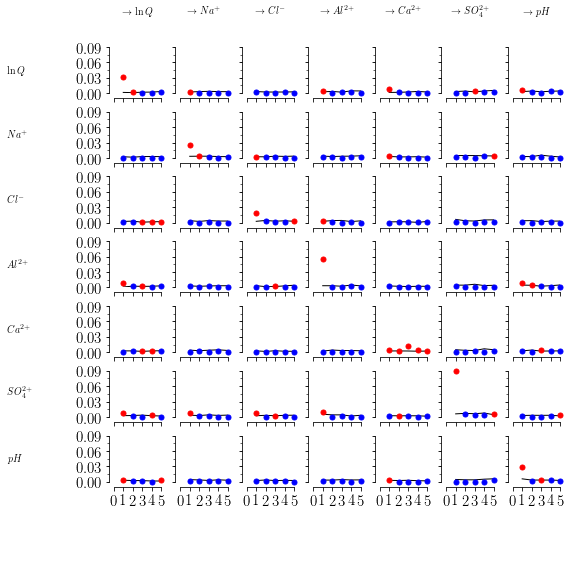

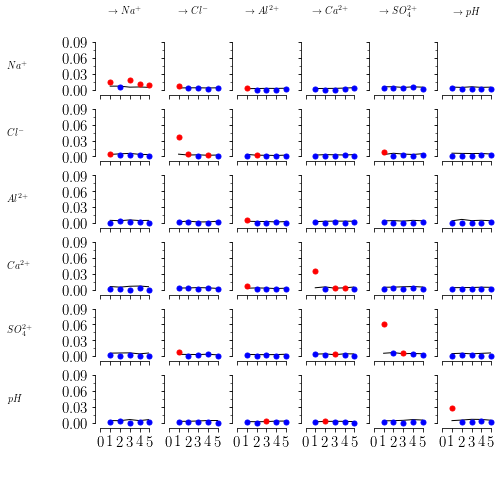

In [6]:
################## Raw Data ##################
lag_func_matrix1 = tigramite_plotting.setup_matrix(
    N=N1,
    figsize=(8, 8),
    tau_max=tau_max1,
    minimum=-.0, maximum=.09, y_base= 0.03,
    var_names=var_names1)
lag_func_matrix1.add_lagfuncs_nocontemp(
#     lagfuncs=lagfuncs_nocontemp1,
    lagfuncs=filter_neighbor(np.abs(lagfuncs1)),
    sig_thres=sigthres1,
    markersize=10,
    color1='red',
    color2='blue',
    label='MIT',
    logscale=False
)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
# lag_func_matrix1.fig.savefig('./lag_stream_raw_data.eps', transparent=True, 
#                             format='eps', bbox_inches='tight')

################## Flow Rate Corrected Data ##################
lag_func_matrix2 = tigramite_plotting.setup_matrix(
    N=N2,
    figsize=(7, 7),
    tau_max=tau_max1,
    minimum=-.0, maximum=.09, y_base= 0.03,
    var_names=var_names2)
lag_func_matrix2.add_lagfuncs_nocontemp(
#     lagfuncs=lagfuncs_nocontemp2,
    lagfuncs=filter_neighbor(np.abs(lagfuncs2)),
    sig_thres=sigthres2,
    markersize=10,
    color1='red',
    color2='blue',
    label='MIT',
    logscale=False
)
plt.subplots_adjust(hspace=0.4, wspace=0.4);
# lag_func_matrix2.fig.savefig('./lag_stream_flowrate_corrected.eps', transparent=True, 
#                             format='eps', bbox_inches='tight')

# Plot the DAG for time-series

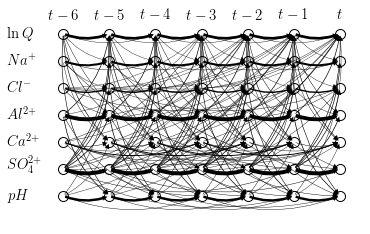

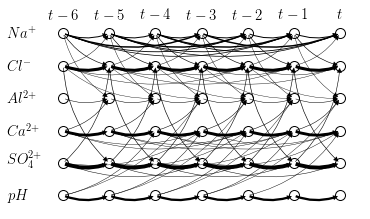

In [7]:
################## Raw Data ##################
fig1 = plt.figure(figsize=(5, 4), frameon=False)
ax1 = fig1.add_subplot(111, frame_on=False)
tigramite_plotting.plot_time_series_graph2(
     fig=fig1, ax=ax1,
#     lagfuncs=lagfuncs_nocontemp1,
    lagfuncs=filter_neighbor(np.abs(lagfuncs1)),
    sig_thres=sigthres1,
    var_names=var_names1,
    vmin_edges=0., vmax_edges=.08,
    edge_ticks=.02,
    cmap_edges='Blues',
    label_fontsize=15,
    node_label_size=15,
    link_colorbar_label=r'MIT [nats]')
fig1.subplots_adjust(left=0.1, right=.98, bottom=.25, top=.9)
# fig1.savefig('./tsg_stream_raw_data.eps', transparent=True, format='eps', bbox_inches='tight')

################## Flow Rate Corrected Data ##################
fig2 = plt.figure(figsize=(5, 4), frameon=False)
ax2 = fig2.add_subplot(111, frame_on=False)
tigramite_plotting.plot_time_series_graph2(
     fig=fig2, ax=ax2,
#     lagfuncs=lagfuncs_nocontemp2,
    lagfuncs=filter_neighbor(np.abs(lagfuncs2)),
    sig_thres=sigthres2,
    var_names=var_names2,
    vmin_edges=0., vmax_edges=.08,
    edge_ticks=.02,
    cmap_edges='Blues',
    label_fontsize=15,
    node_label_size=15,
    link_colorbar_label=r'MIT [nats]')
fig2.subplots_adjust(left=0.1, right=.98, bottom=.25, top=.9);
# fig2.savefig('./tsg_stream_raw_data.eps', transparent=True, format='eps', bbox_inches='tight')